# Rail Mapping

## About

Mapping Rail Lines and Rail Nodes in the United States.  

This is a precursor project to one that will create a graph of rail, shipping, trucking, and air freight transport networks for analysis. 



## Import Functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
import contextily as cx

## Reading Node Shape Data into gpd DF
 

In [2]:
shapefilepath = "/Users/jnapolitano/Projects/rail-mapping/North_American_Rail_Nodes/North_American_Rail_Nodes.shp"

node_df = gpd.read_file(shapefilepath)



node_df.head()

,OBJECTID,FRANODEID,COUNTRY,STATE,STFIPS,CTYFIPS,STCYFIPS,FRADISTRCT,PASSNGR,PASSNGRSTN,BNDRY,geometry
0,1,300000,US,HI,15,009,15009,7,None,None,0,POINT (-156.68973 20.93653)
1,2,300001,US,HI,15,009,15009,7,None,None,0,POINT (-156.68972 20.93916)
2,3,300002,US,HI,15,009,15009,7,None,None,0,POINT (-156.67932 20.88014)
3,4,300003,US,HI,15,009,15009,7,None,None,0,POINT (-156.67863 20.88102)
4,5,300004,US,AK,02,170,02170,8,None,None,0,POINT (-150.12336 62.39174)


## Checking Cooridindate System.  

The coordinate system must be in the epsg 3857 format to overlay.

In [3]:
node_df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Converting to EPSG 3857 System 



In [4]:
df_wm = node_df.to_crs(epsg=3857)

## Plotting Every Rail node in the United States, Mexico, and Canada

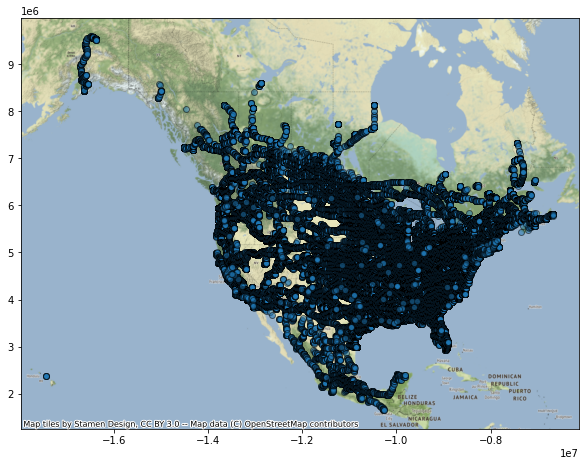

In [5]:
ax = df_wm.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
cx.add_basemap(ax, zoom=5)

## Discussion of results Thus Far

### Detail

Mapping every node in the data set produces too much noise to be useful.  It is interesting though that the rail coverage in north america nearly covers the entire continent.

### Next Steps

I will decrease the marker size to see if it improved the detail and usability of the plot.

## Plotting Data with Smaller Markers

KeyboardInterrupt: 

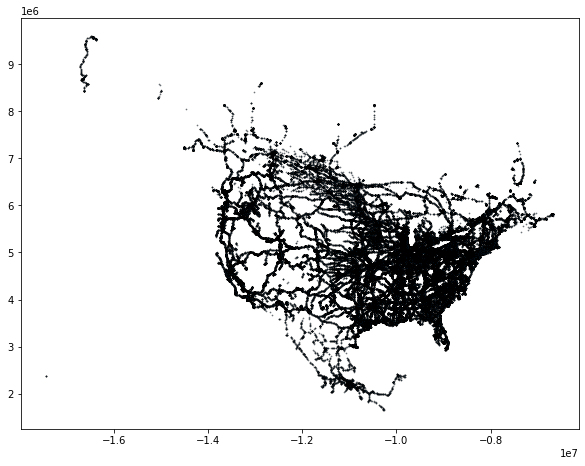

In [6]:
ax = df_wm.plot(figsize=(10, 10), alpha=0.5, edgecolor='k', markersize = .5)
cx.add_basemap(ax, zoom=7)

### Results
We have increased our detail to an acceptable level to understand just how interconnected the rail system is in North America.  The data plotted thus far is a collection of all points. Next, we'll review the data to identify points that may yield more interesting results

## Filtering the Dataset


### Printing the head of the dataframe for review

In [15]:
df_wm.head()

,OBJECTID,FRANODEID,COUNTRY,STATE,STFIPS,CTYFIPS,STCYFIPS,FRADISTRCT,PASSNGR,PASSNGRSTN,BNDRY,geometry
0,1,300000,US,HI,15,009,15009,7,None,None,0,POINT (-17442620.562 2384312.109)
1,2,300001,US,HI,15,009,15009,7,None,None,0,POINT (-17442620.281 2384624.961)
2,3,300002,US,HI,15,009,15009,7,None,None,0,POINT (-17441462.226 2377592.829)
3,4,300003,US,HI,15,009,15009,7,None,None,0,POINT (-17441385.698 2377697.091)
4,5,300004,US,AK,02,170,02170,8,None,None,0,POINT (-16711656.316 8952635.016)


### Western US Transit Bottle Necks.

There is an obvious bottle neck present on the maps plotted above.  The western United States appears to be serviced by 2 or 3 rail lines that branch out near Colorado.  I want to investigate this further.

#### Understanding the Fields

The data source does not detail the fields very well.  https://geo.dot.gov/mapping/rest/services/NTAD/North_American_Rail_Nodes/MapServer/0

Unfortunately, we'll have to infer their meaning.

##### Unique PASSNGR Values

My best guess is that these values designate nodes that serve passenger transport.

In [16]:
df_wm['PASSNGR'].unique()

array([None, 'A', 'C', 'B', 'b', 'R'], dtype=object)

##### Results

It is still not clear what these values translate to.  I'll have to continue investigating.

##### Unique PASSNGRSTN Values

My best guess is that these values designate nodes that serve as passenger transport terminals.

In [17]:
results = df_wm['PASSNGRSTN'].unique()
print(results)

[None 'Albany' 'Eugene' ... 'Chelsea' 'Rockport'
 '59th St. (U. of Chicago)']


###### Results

I think my guess is correct.  These are definetely commmuter stations.  I recognize Boston Landing and 59th ST. (U. of Chicago) from travel.  I can't assume however that these are only passenger stations.  They may also be freight connections.  Therefore, I cannot yet eliminate them from the dataset. 

##### Unique FRADISTRICT

These values are associated with Federal Railroad Association Districts.  I was able to find the the key for the values at https://railroads.dot.gov/divisions/regional-offices/safety-management-teams. 

This will be useful to investigate the bottle necks by railway and safety zone, but still does not help me to completely eliminate commuter and passengers.

In [18]:
results = df_wm['FRADISTRCT'].unique()
print(results)

[ 7  8 99  6  5  4  3  2  1]


## Attempting to Discern meaning from an Accompanying Dataset

I could not infer exactly what the node data means without the keys.  I will have to look online for more information.  In the mean time however I will map and explore the rail line data. 

### Loading the Rail Line Data


In [19]:
shapefilepath = "/Users/jnapolitano/Projects/rail-mapping/North_American_Rail_Lines/North_American_Rail_Lines.shp"

line_df = gpd.read_file(shapefilepath)



line_df.head()

,OBJECTID,FRAARCID,FRFRANODE,TOFRANODE,STFIPS,CNTYFIPS,STCNTYFIPS,STATEAB,COUNTRY,FRADISTRCT,...,CARDDIRECT,NET,MILES,KM,TIMEZONE,IM_RT_TYPE,DBLSTK,Shape_Leng,ShapeSTLen,geometry
0,1,300000,348741,348746,38,015,38015,ND,US,8,...,None,M,0.178101,0.286626,C,None,None,0.003194,418.656759,"LINESTRING (-100.74521 46.80285, -100.74509 46..."
1,2,300001,338567,338686,30,087,30087,MT,US,8,...,None,O,0.886585,1.426824,M,None,None,0.017227,2047.012225,"LINESTRING (-106.65759 45.86405, -106.65769 45..."
2,3,300002,330112,330117,16,031,16031,ID,US,8,...,None,M,0.221820,0.356985,M,None,None,0.004269,483.919572,"LINESTRING (-113.78532 42.54225, -113.78342 42..."
3,4,300003,330113,330116,16,031,16031,ID,US,8,...,None,I,0.127571,0.205306,M,None,None,0.002484,278.254150,"LINESTRING (-113.78484 42.54231, -113.78482 42..."
4,5,300004,329497,329504,16,063,16063,ID,US,8,...,None,M,0.447515,0.720207,M,DS,UP-DS,0.008412,982.887938,"LINESTRING (-114.40776 42.93610, -114.40763 42..."


## Checking Cooridindate System.  

The coordinate system must be in the epsg 3857 format to overlay.

In [20]:
line_df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Converting to EPSG 3857 System 



In [21]:
line_wm = line_df.to_crs(epsg=3857)

## Plotting Every Rail Line in the United States, Mexico, and Canada

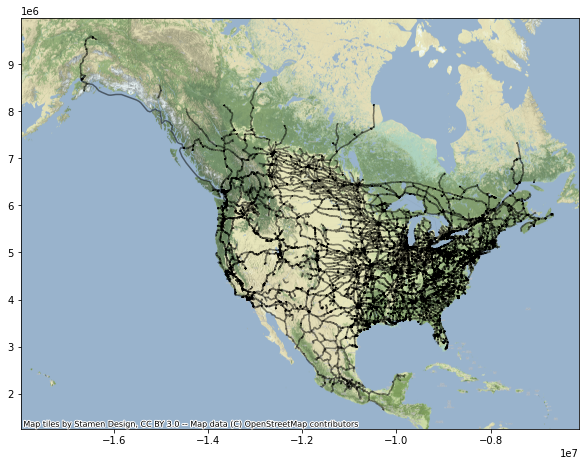

In [22]:
ax = line_wm.plot(figsize=(10, 10), alpha=0.5, edgecolor='k', markersize = .5)
cx.add_basemap(ax, zoom=7)

In [23]:
line_wm.columns


Index(['OBJECTID', 'FRAARCID', 'FRFRANODE', 'TOFRANODE', 'STFIPS', 'CNTYFIPS',
       'STCNTYFIPS', 'STATEAB', 'COUNTRY', 'FRADISTRCT', 'RROWNER1',
       'RROWNER2', 'RROWNER3', 'TRKRGHTS1', 'TRKRGHTS2', 'TRKRGHTS3',
       'TRKRGHTS4', 'TRKRGHTS5', 'TRKRGHTS6', 'TRKRGHTS7', 'TRKRGHTS8',
       'TRKRGHTS9', 'DIVISION', 'SUBDIV', 'BRANCH', 'YARDNAME', 'PASSNGR',
       'STRACNET', 'TRACKS', 'CARDDIRECT', 'NET', 'MILES', 'KM', 'TIMEZONE',
       'IM_RT_TYPE', 'DBLSTK', 'Shape_Leng', 'ShapeSTLen', 'geometry'],
      dtype='object')

In [24]:
line_wm.STRACNET.unique()

array([None, 'S', 'C'], dtype=object)